In [666]:
import sys,os,argparse,time
import numpy as np
import torch
from datetime import datetime
import pickle
import pandas as pd
tstart=time.time()
import matplotlib.pyplot as plt 
from tabulate import tabulate
from prettytable import PrettyTable
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(font_scale=3)
import statsmodels.stats.inter_rater as stats

In [488]:
# Load data:
data = pd.read_csv('not_normallized.csv')
# Normalize non-binary values:
binary_cols = ['Stamp', 'Using circle', 'Using arrow', 'Robot within group?', 'Robot facing group?', 'Robot facing closest human?',
            'Robot facing 2nd closest human?', 'Robot facing 3rd closest human?',
            'Closest human facing robot?', '2nd closest human facing robot?',
            '3d closest human facing robot?', 'Vacuum cleaning', 'Mopping the floor',
            'Carry warm food', 'Carry cold food', 'Carry drinks',
            'Carry small objects (plates, toys)',
            'Carry big objects (tables, chairs)',
            'Cleaning (Picking up stuff) / Starting conversation']
normalized = data.copy()
for col in normalized:
    if col not in binary_cols:
        normalized[col] = (normalized[col]-normalized[col].min())/(normalized[col].max()-normalized[col].min())

,Distance to closest human,Distance to 2nd closest human,Distance to 3rd closest human,Direction to closest human,Direction to 2nd closest human,Direction to 3rd closest human,Direction from closest human to robot,Robot facing closest human?,Robot facing 2nd closest human?,Robot facing 3rd closest human?
48,0.019335,0.024974,0.034370,0.191321,0.356105,0.256557,0.286552,0.0,1.0,0.0
49,0.019335,0.024974,0.034370,0.191321,0.356105,0.256557,0.286552,0.0,1.0,0.0
50,0.019335,0.024974,0.034370,0.191321,0.356105,0.256557,0.286552,0.0,1.0,0.0
51,0.019335,0.024974,0.034370,0.191321,0.356105,0.256557,0.286552,0.0,1.0,0.0
52,0.019335,0.024974,0.034370,0.191321,0.356105,0.256557,0.286552,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11045,0.029670,0.048293,0.100938,0.115966,0.051532,0.084214,0.037625,0.0,0.0,0.0
11046,0.029670,0.048293,0.100938,0.115966,0.051532,0.084214,0.037625,0.0,0.0,0.0
11047,0.029670,0.048293,0.100938,0.115966,0.051532,0.084214,0.037625,0.0,0.0,0.0
11048,0.029670,0.048293,0.100938,0.115966,0.051532,0.084214,0.037625,0.0,0.0,0.0


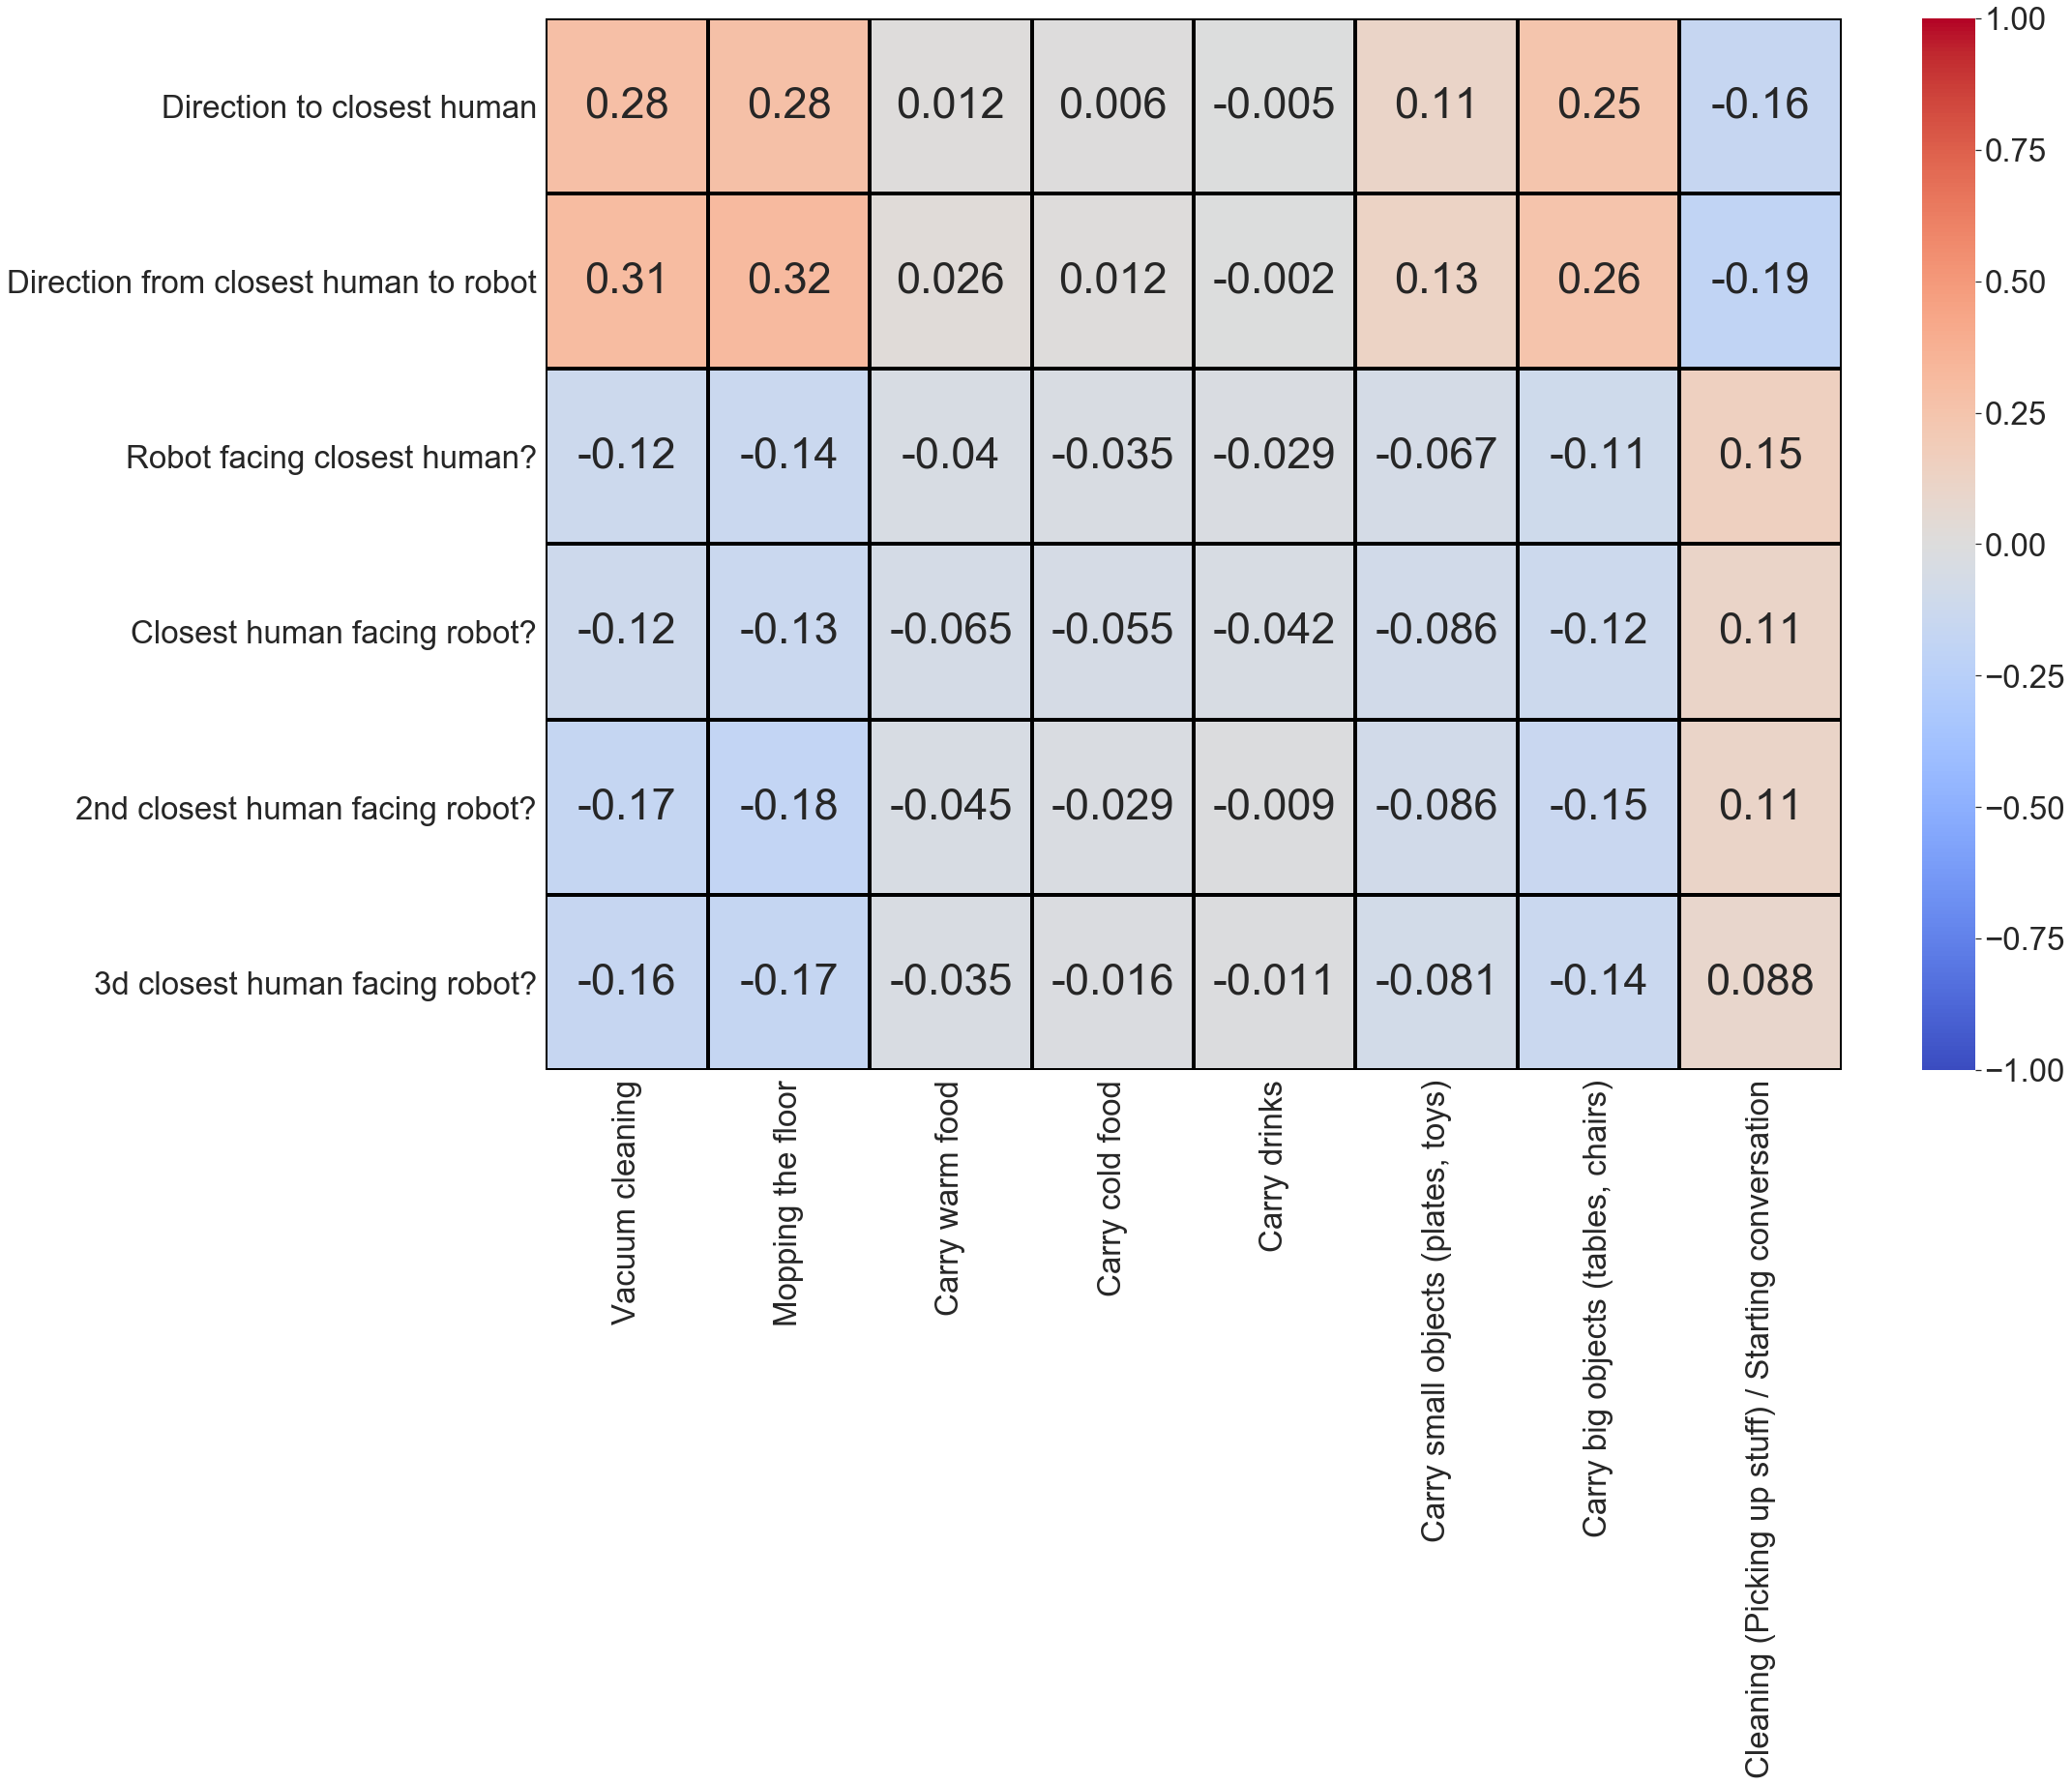

In [524]:
index1 = [2, 3, 4, 5, 6, 9, 12, 15, 16, 19, 22, 23, 24, 25, 26, 28]
index2 = np.arange(29)
index3 = [2, 3, 4, 5, 6, 7]
index4 = [9, 10, 11, 23, 25]
index5 =  [12, 15, 16, 19, 20, 21]
# Only samples with a standing human:
normalized = data.copy()
for col in normalized:
    if col not in binary_cols:
        normalized[col] = (normalized[col]-normalized[col].min())/(normalized[col].max()-normalized[col].min())
normalized = normalized[(normalized['Using circle'] == 0)]
display(normalized.iloc[:,10:20])
correlations = normalized.iloc[:,1:].corr(method='pearson').iloc[index5,29:].round(3)
#display(correlations)
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(correlations, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',annot_kws={"size": 45})
plt.show()

In [525]:
# Load data:
data = pd.read_csv('not_normallized.csv')
proxemics1 = data[(data['Distance to closest human'] < 0.45) & (data['Using arrow'] == 0)]
proxemics2 = data[(data['Distance to closest human'] > 0.45) & (data['Distance to closest human'] < 1.2) & (data['Using arrow'] == 1)]
proxemics3 = data[(data['Distance to closest human'] > 1.2) & (data['Distance to closest human'] < 3.6) & (data['Using arrow'] == 1)]
proxemics4 = data[(data['Distance to closest human'] > 3.6) & (data['Distance to closest human'] < 7.6) & (data['Using arrow'] == 1)]
proxemics = [proxemics1, proxemics2, proxemics3, proxemics4]
first_it = True
for personal_space in range(4):
    if first_it == True:
        labels = np.array(proxemics1.iloc[:,-8:].mean().values)
        first_it = False
    else:
        labels = np.dstack([labels, proxemics[personal_space].iloc[:,-8:].mean().values])

print(labels[0,0,:])

[2.04918033 2.36808118 2.6981383  3.25892857]


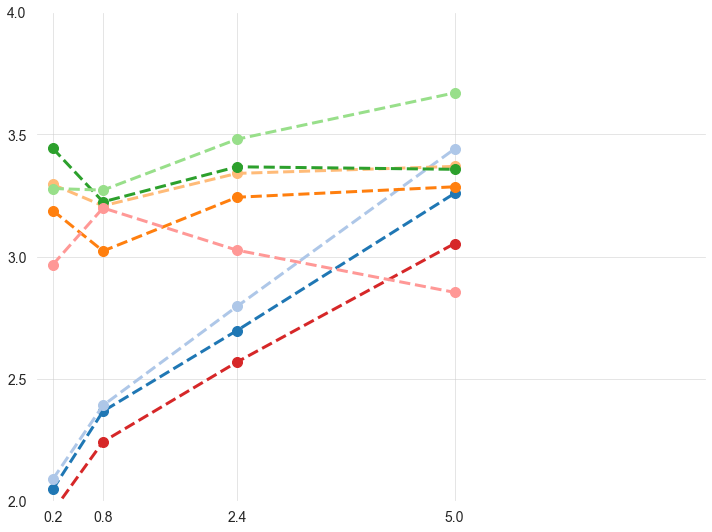

In [527]:
import matplotlib.pyplot as plt  
import pandas as pd  

# These are the "Tableau 20" colors as RGB.    
tableau = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau)):    
    r, g, b = tableau[i]    
    tableau[i] = (r / 255., g / 255., b / 255.)    
  
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 9))   
ax = plt.gca()
ax.set_facecolor('white')

# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(2, 4)    
plt.xlim(0, 8)    
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(fontsize=14)   
x = [0.2, 0.8, 2.4, 5]
plt.xticks(x, fontsize=14)  
 
# Now that the plot is prepared, it's time to actually plot the data!    
# Note that I plotted the majors in order of the highest % in the final year.    
actions= ['Vacuum cleaning', 'Mopping the floor', 'Carry warm food', 'Carry cold food', 'Carry drinks', 'Carry small objects (plates, toys)', 'Carry big objects (tables, chairs)', 'Starting conversation']

for rank, column in enumerate(actions):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(x,    
            labels[0,rank,:], '--o',ms = 10,    
            lw=3, color=tableau[rank])  


plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.color'] = "#cccccc"
plt.grid(True)
plt.show()  

In [587]:
# Load data:
data = pd.read_csv('not_normallized.csv')
#data = data[data['Using circle']==0]
facing1_arrow = data[(data['Number of people'] > 0) & (data['Robot facing closest human?'] == 0) & (data['Closest human facing robot?'] == 0)]
facing2_arrow = data[(data['Number of people'] > 0) & (data['Robot facing closest human?'] == 1) & (data['Closest human facing robot?'] == 0)]
facing3_arrow = data[(data['Number of people'] > 0) & (data['Robot facing closest human?'] == 0) & (data['Closest human facing robot?'] == 1)]
facing4_arrow = data[(data['Number of people'] > 0) & (data['Robot facing closest human?'] == 1) & (data['Closest human facing robot?'] == 1)]
facing_arrow = [facing1, facing2, facing3, facing4]

first_it = True
for facings in range(4):
    if first_it == True:
        labels1 = np.array(facing1.iloc[:,-8:].mean().values)
        first_it = False
    else:

        labels1 = np.dstack([labels1, facing[facings].iloc[:,-8:].mean().values])


(1, 8, 4)


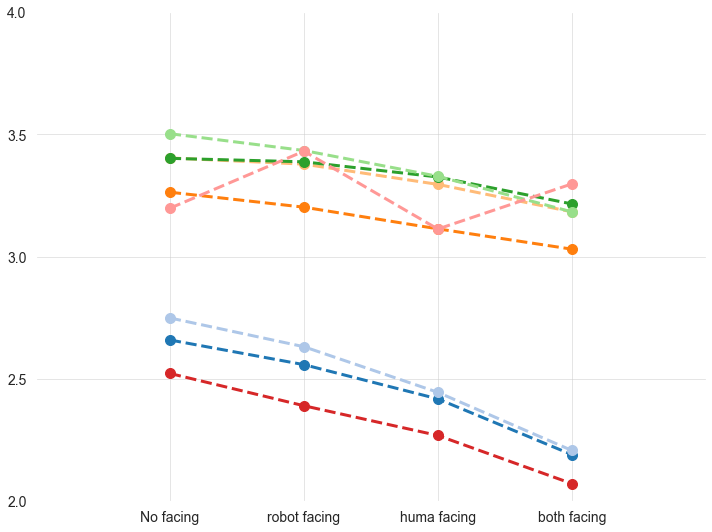

In [588]:
import matplotlib.pyplot as plt  
import pandas as pd  

# These are the "Tableau 20" colors as RGB.    
tableau = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau)):    
    r, g, b = tableau[i]    
    tableau[i] = (r / 255., g / 255., b / 255.)    
  
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 9))   
ax = plt.gca()
ax.set_facecolor('white')

# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(2, 4)    
plt.xlim(0, 5)    
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(fontsize=14) 
x = [1, 2, 3, 4]
plt.xticks(x, ['No facing', 'robot facing', 'huma facing', 'both facing'], fontsize=14)  

print(labels1.shape)
# Now that the plot is prepared, it's time to actually plot the data!    
# Note that I plotted the majors in order of the highest % in the final year.    
actions= ['Vacuum cleaning', 'Mopping the floor', 'Carry warm food', 'Carry cold food', 'Carry drinks', 'Carry small objects (plates, toys)', 'Carry big objects (tables, chairs)', 'Starting conversation']

for rank, column in enumerate(actions):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    if column[0] == 'C':
        if column[-1] == 'rs)':
            a = 1
        #else:
            #continue
    plt.plot(x,    
            labels1[0,rank,:], '--o',ms = 10,    
            lw=3, color=tableau[rank])  


plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.color'] = "#cccccc"
plt.grid(True)
plt.show()  

In [760]:
# Interannotator agreement Fleiss Kappa, all scenes
data = pd.read_csv('not_normallized.csv')
scenes = np.arange(255, 1000, 1)
fleiss_dict = {}
actions= ['Vacuum cleaning', 'Mopping the floor', 'Carry warm food', 'Carry cold food', 'Carry drinks', 'Carry small objects (plates, toys)', 'Carry big objects (tables, chairs)', 'Starting conversation']
for action in actions:
    fleiss_dict[action] = np.zeros((1,5))

for scene in scenes:
    scene_df = data[data.Stamp == scene].iloc[:,-8:]
    for i, action in enumerate(actions):
        tmp_actions_counted = np.zeros((1,5))
        if action == 'Starting conversation':
            judgements = np.array(scene_df['Cleaning (Picking up stuff) / Starting conversation'].values)
        else:
            judgements = np.array(scene_df[action].values)
        if judgements.shape[0] < 12:
            continue
        for j, answer in enumerate(judgements):
            if j > 11:
                continue
            tmp_actions_counted[0][int(answer)-1] += 1
        fleiss_dict[action] = np.vstack([fleiss_dict[action], tmp_actions_counted])

In [761]:
# Using stats package
for action in actions:
    fleiss_dict[action] = fleiss_dict[action][1:,:] 
    print(stats.fleiss_kappa(fleiss_dict[action], method='fleiss'))

0.10430317217949185
0.10703532256901449
0.030165792653256862
0.025443799145894678
0.024825101081576102
0.028899601755934562
0.06888740411182898
0.05730722616755599


In [762]:
# Calculating
table = fleiss_dict['Mopping the floor']
a = np.array([12, 0, 0, 0, 0])
for i in range(10):
    a = np.vstack([a,a])
#table = a
n = 12
N = table.shape[0]
k = 5
a = n*N
p = np.sum(table, axis = 0)/a
P = (1/(a))*(np.sum(np.square(table), axis = 1)-n)
#print('P:', P)
P_mean = np.mean(P)
Pe = np.sum(np.square(p))
kappa = (P_mean - Pe)/(1-Pe)
print('Kappa:', kappa)
print('P mean: ', P_mean)
print('Pe: ', Pe)

Kappa: -0.26509006163317245
P mean:  0.004701193464570397
Pe:  0.2132585365104006


In [804]:
# Interannotator agreement Fleiss Kappa, per scenes
data = pd.read_csv('not_normallized.csv')
scenes = np.arange(255, 1000, 1)
fleiss_dict = {}
actions= ['Vacuum cleaning', 'Mopping the floor', 'Carry warm food', 'Carry cold food', 'Carry drinks', 'Carry small objects (plates, toys)', 'Carry big objects (tables, chairs)', 'Starting conversation']
for scene in scenes:
    fleiss_dict[scene] = np.zeros((1,5))

for scene in scenes:
    scene_df = data[data.Stamp == scene].iloc[:,-8:]
    for i, action in enumerate(actions):
        tmp_actions_counted = np.zeros((1,5))
        if action == 'Starting conversation':
            judgements = np.array(scene_df['Cleaning (Picking up stuff) / Starting conversation'].values)
        else:
            judgements = np.array(scene_df[action].values)
        if judgements.shape[0] < 12:
            if i == 7:
                del fleiss_dict[scene]
            continue
        for j, answer in enumerate(judgements):
            if j > 11:
                continue
            tmp_actions_counted[0][int(answer)-1] += 1
        fleiss_dict[scene] = np.vstack([fleiss_dict[scene], tmp_actions_counted])

In [806]:
keys = []
for key in fleiss_dict:
    fleiss_dict[key] = fleiss_dict[key][1:,:] 
    keys.append(key)

In [832]:
kappas = []
kappa_scenes = []
for key in fleiss_dict:
    # Calculating
    table = fleiss_dict[key]
    a = np.array([[12, 0, 0, 0, 0],[0, 12, 0, 0, 0],[0, 0, 12, 0, 0],[0, 0, 0, 12, 0],[0, 0, 0, 0, 12]])
    #table = a
    n = 12
    N = table.shape[0]
    k = 5
    p = np.sum(table, axis = 0)/(n*N)
    #print('p', p)
    P = (1/((n)*(n-1))) * (np.sum(np.square(table), axis = 1)-n)
    #print('P:', P)
    P_mean = np.mean(P)
    Pe = np.sum(np.square(p))
    kappa = (P_mean - Pe)/(1-Pe)
    #print('Kappa:', kappa)
    #print('P mean: ', P_mean)
    #print('Pe: ', Pe)
    kappas.append(kappa)
    kappa_scenes.append(key)

In [835]:
print(kappas[0], kappa_scenes[0])
print(np.mean(kappas))
print(np.max(kappas), np.argmax(kappas))
print(np.min(kappas), np.argmin(kappas))

-0.02274765593151247 270
0.01158352574779621
0.2109246976199765 564
-0.07796203796203793 605


In [842]:
# Using stats package
kappas_2 = []
for key in fleiss_dict:
    kappas_2.append(stats.fleiss_kappa(fleiss_dict[key], method='fleiss'))
print(np.mean(kappas_2))
print(np.max(kappas_2), np.argmax(kappas_2))
print(np.min(kappas_2), np.argmin(kappas_2))

0.0115835257477962
0.2109246976199765 564
-0.07796203796203793 605
